
  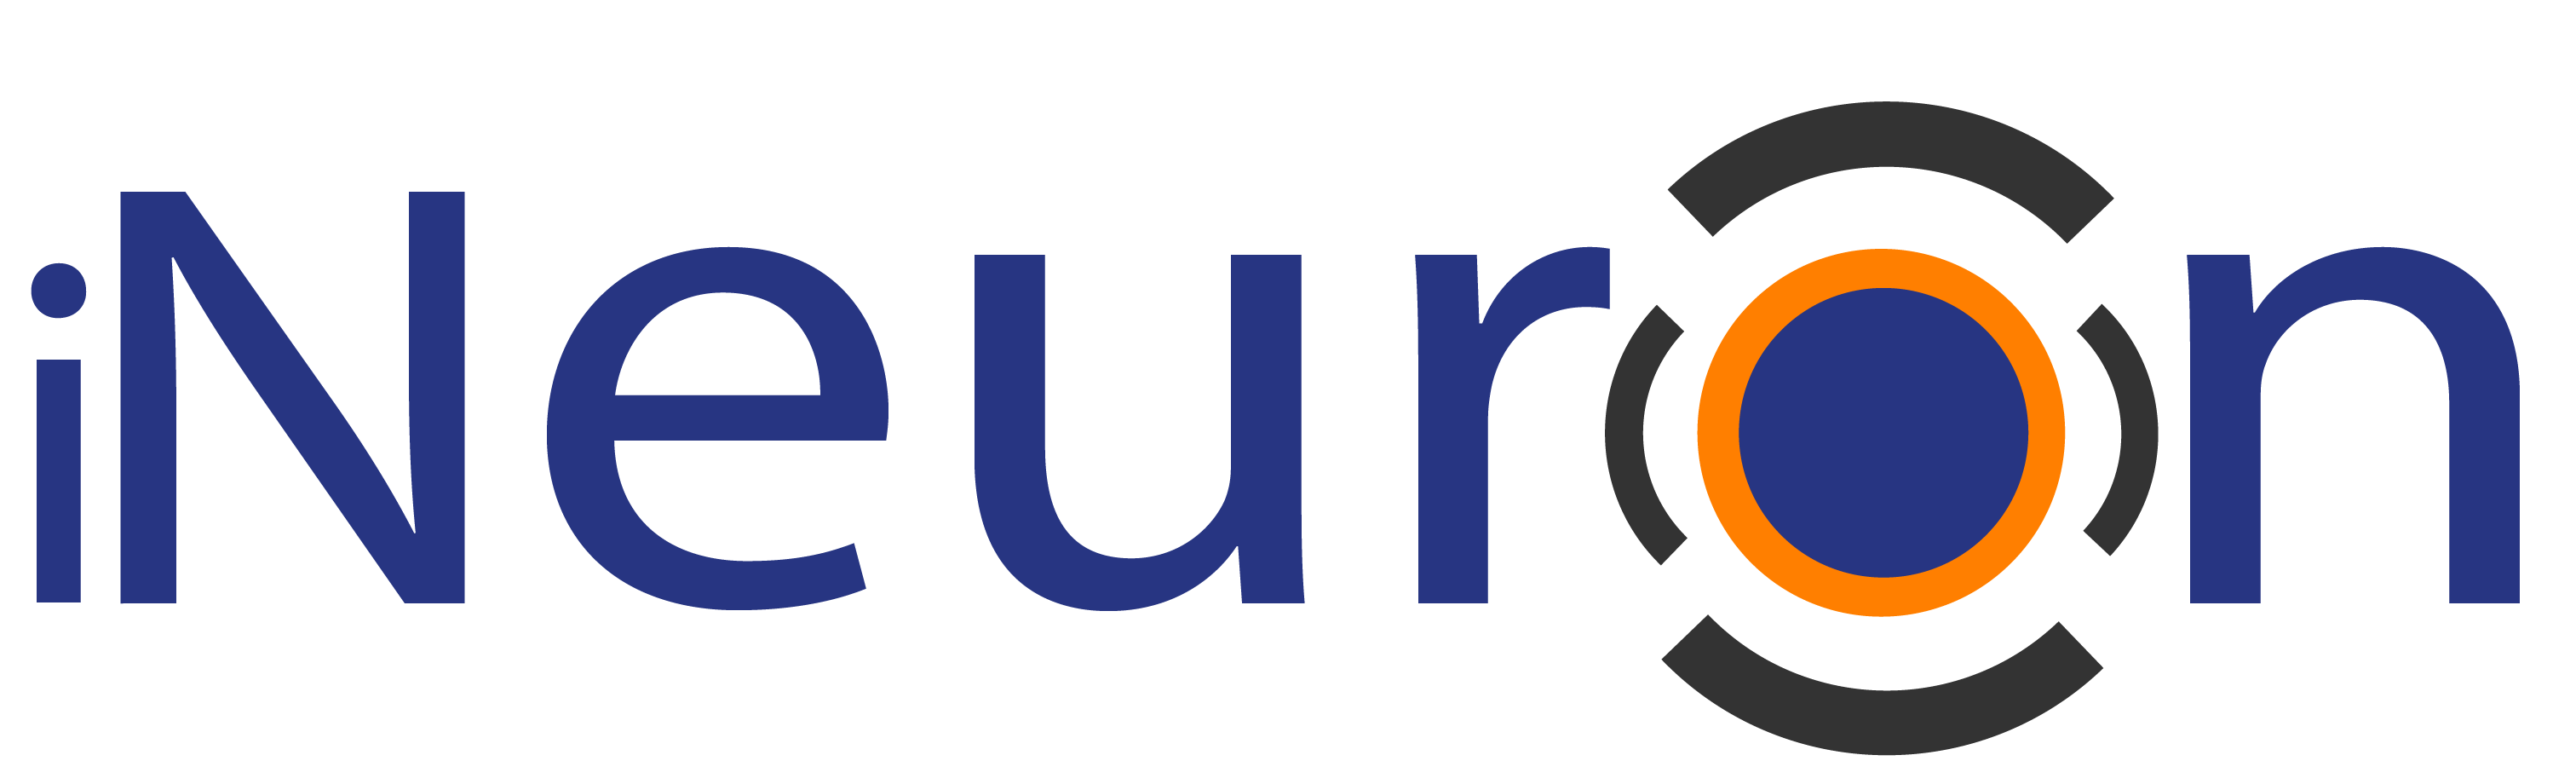

# Class - 64 `Deep Learning`  

## 29 January 2023
In this class **Sunny Savita Sir** taught the practical of **Convolutional Neural Network (CNN)** 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # image related ops
import numpy as np
import cv2 # opencv lib

In [2]:
img_path="/content/car1.jpeg"

In [3]:
car1 = mpimg.imread(img_path)

In [4]:
car1.shape

(168, 300, 3)

In [5]:
car1[167].shape

(300, 3)

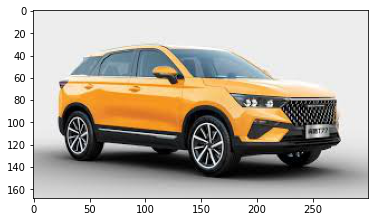

In [6]:
plt.imshow(car1)

In [7]:
car1[0][0]

array([237, 237, 237], dtype=uint8)

In [8]:
car1_cv2 = cv2.imread(img_path)

In [9]:
car1_cv2

array([[[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       ...,

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [211, 211, 211]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [213, 213, 213],
        [213, 213, 213],
        [213, 213, 213]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]]

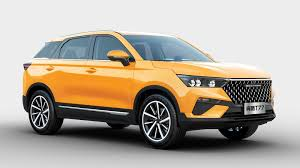

In [10]:
from google.colab.patches import cv2_imshow
cv2_imshow(car1_cv2)

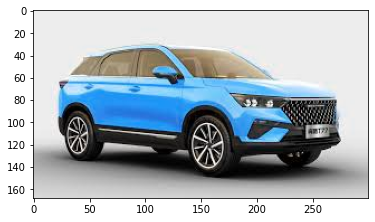

In [11]:
plt.imshow(car1_cv2) # cv2 reads images as BGR and in matplotlib reads as RGB

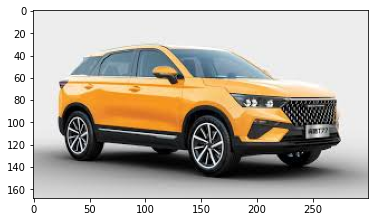

In [12]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

In [13]:
car1_cv2_BGR_RGB

array([[[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       ...,

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [211, 211, 211]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [213, 213, 213],
        [213, 213, 213],
        [213, 213, 213]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]]

In [14]:
car1_cv2_BGR_RGB.shape

(168, 300, 3)

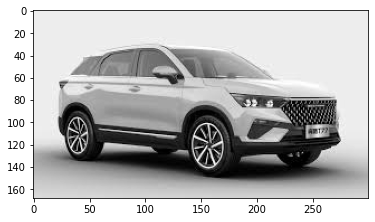

In [15]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [16]:
car1_cv2_BGR_GRAY


array([[237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       ...,
       [216, 216, 216, ..., 211, 211, 211],
       [217, 217, 217, ..., 213, 213, 213],
       [217, 217, 217, ..., 214, 214, 214]], dtype=uint8)

In [17]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [18]:
car1_cv2_BGR_GRAY.min(), car1_cv2_BGR_GRAY.max()

(0, 255)

In [19]:
cv2.split(car1_cv2)

(array([[237, 237, 237, ..., 237, 237, 237],
        [237, 237, 237, ..., 237, 237, 237],
        [237, 237, 237, ..., 237, 237, 237],
        ...,
        [216, 216, 216, ..., 211, 211, 211],
        [217, 217, 217, ..., 213, 213, 213],
        [217, 217, 217, ..., 214, 214, 214]], dtype=uint8),
 array([[237, 237, 237, ..., 237, 237, 237],
        [237, 237, 237, ..., 237, 237, 237],
        [237, 237, 237, ..., 237, 237, 237],
        ...,
        [216, 216, 216, ..., 211, 211, 211],
        [217, 217, 217, ..., 213, 213, 213],
        [217, 217, 217, ..., 214, 214, 214]], dtype=uint8),
 array([[237, 237, 237, ..., 237, 237, 237],
        [237, 237, 237, ..., 237, 237, 237],
        [237, 237, 237, ..., 237, 237, 237],
        ...,
        [216, 216, 216, ..., 211, 211, 211],
        [217, 217, 217, ..., 213, 213, 213],
        [217, 217, 217, ..., 214, 214, 214]], dtype=uint8))

# understanding composition of colored images

In [20]:
def viusalize_RGB_channel(imgArray=None, figsize=(10,7)):
  # splitting the RGB components
  B, G, R = cv2.split(imgArray)

  # create zero matrix of shape of image
  Z = np.zeros(B.shape, dtype=B.dtype) # can use any channel

  # init subplots
  fig, ax = plt.subplots(2,2, figsize=figsize)

  # plotting the actual image and RGB images
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("Original Image")
  # ax[0,0].set_axis_off()
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red Ch Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green Ch Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue Ch Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))


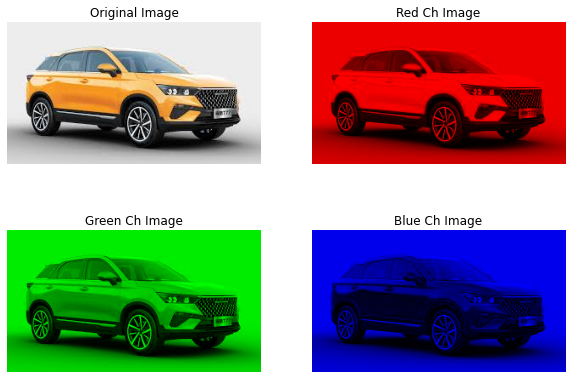

In [ ]:
viusalize_RGB_channel(imgArray=car1_cv2)

In [21]:
random_colored_img = np.random.randint(0, 255, (6,6,3))


In [22]:
random_colored_img

array([[[ 61, 222, 178],
        [ 75, 117,  73],
        [217, 198, 191],
        [190, 140, 130],
        [ 35, 238, 143],
        [171, 227, 136]],

       [[229, 203, 188],
        [ 90, 225, 201],
        [202, 212, 209],
        [246, 118, 154],
        [ 42, 131, 195],
        [208,  90,   3]],

       [[132, 148,  93],
        [175,  78, 129],
        [146,  98, 131],
        [132, 188, 242],
        [247, 204, 128],
        [ 92,  83, 201]],

       [[179,  51, 125],
        [ 75, 223,  60],
        [  4, 166, 112],
        [146, 187, 229],
        [207,  78, 198],
        [171,  65, 112]],

       [[192, 178, 164],
        [ 14, 253, 104],
        [241, 137,  57],
        [237, 251,  88],
        [212,  37, 239],
        [194, 237, 148]],

       [[ 21, 131, 173],
        [138, 123, 122],
        [163, 222, 167],
        [242, 147,  23],
        [ 53,  64,  29],
        [149, 186, 155]]])

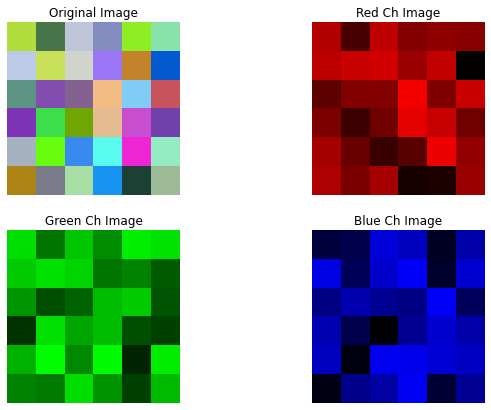

In [23]:
viusalize_RGB_channel(imgArray=random_colored_img)

# understanding filters

In [24]:
sobel = np.array([[ 1, 0,-1],
                  [ 2, 0,-2],
                  [ 1, 0,-1]])


In [25]:
print("highlighting Vertical edges:\n", sobel)

highlighting Vertical edges:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [26]:
print("highlighting Horizontal edges:\n", sobel.T)

highlighting Horizontal edges:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [27]:
example1 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

In [28]:
example1 = np.array(example1)

In [29]:
example1

array([[  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0]])

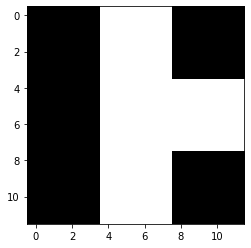

In [30]:
plt.imshow(example1, cmap="gray")

In [31]:
def simple_conv(imgFilter=None, picture=None):
  # extract the shape of the image
  p_row, p_col = picture.shape

  k = imgFilter.shape[0] # k =3

  temp = list()

  stride = 1

  # resulant image size
  final_cols = (p_col - k)//stride + 1
  final_rows = (p_row - k)//stride + 1

  # take vertically down stride across row by row
  for v_stride in range(final_rows):
    # take horizontal right stride across col by col
    for h_stride in range(final_cols):
      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      z = sum(sum(imgFilter * target_area_of_pic))
      temp.append(z)
  
  resulant_image = np.array(temp).reshape(final_rows, final_cols)
  return resulant_image

In [32]:
k = 3
v_stride = 0
h_stride = 0 + 1 + 1
target_area = example1[v_stride: v_stride + k, h_stride: h_stride + k]
target_area

array([[  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255]])

In [33]:
result = simple_conv(imgFilter=sobel, picture=example1)

In [34]:
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

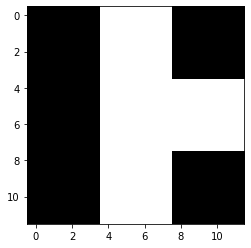

In [35]:
plt.imshow(example1, cmap="gray")

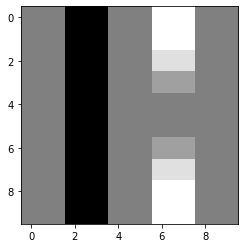

In [36]:
plt.imshow(result, cmap="gray")

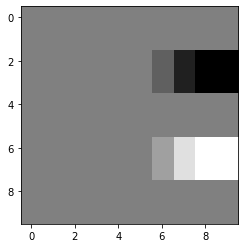

In [37]:
result = simple_conv(imgFilter=sobel.T, picture=example1)
plt.imshow(result, cmap="gray")

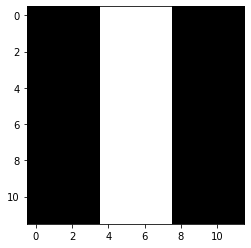

In [38]:
example2 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example2 = np.array(example2)
plt.imshow(example2, cmap="gray")

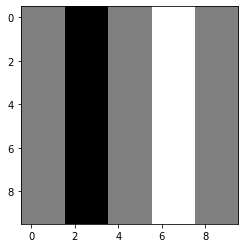

In [39]:
result = simple_conv(imgFilter=sobel, picture=example2)
plt.imshow(result, cmap="gray")

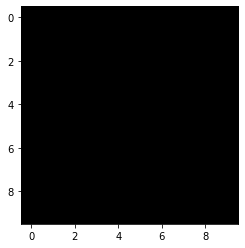

In [40]:
result = simple_conv(imgFilter=sobel.T, picture=example2)
plt.imshow(result, cmap="gray")

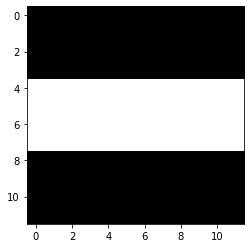

In [41]:
example2_T = np.array(example2.T)
plt.imshow(example2_T, cmap="gray")

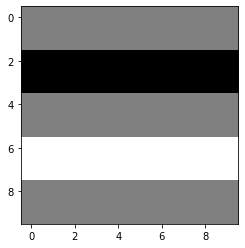

In [42]:
result = simple_conv(imgFilter=sobel.T, picture=example2_T)
plt.imshow(result, cmap="gray")

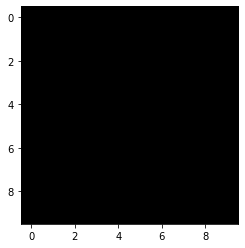

In [43]:
result = simple_conv(imgFilter=sobel, picture=example2_T)
plt.imshow(result, cmap="gray")

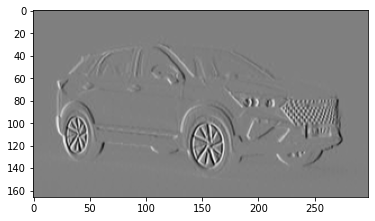

In [44]:
result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

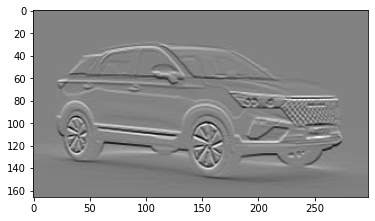

In [45]:
result = simple_conv(imgFilter=sobel.T, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

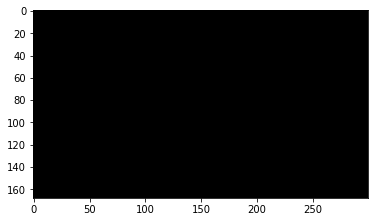

In [46]:
nothing = np.zeros(car1_cv2_BGR_GRAY.shape)
plt.imshow(nothing, cmap="gray")

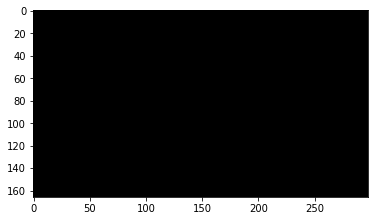

In [47]:
result = simple_conv(imgFilter=sobel.T, picture=nothing)
plt.imshow(result, cmap="gray")

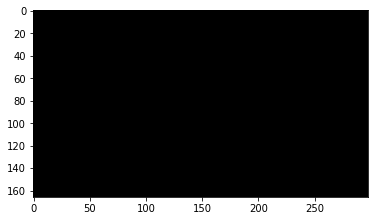

In [48]:
result = simple_conv(imgFilter=sobel, picture=nothing)
plt.imshow(result, cmap="gray")

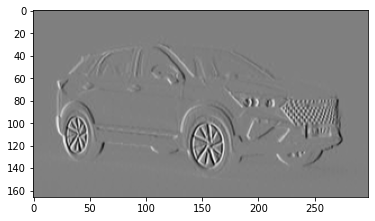

In [49]:
result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [50]:
random_f = np.random.randn(3,3)
random_f

array([[ 1.91321575, -0.41682682, -1.09865729],
       [ 0.30562508, -0.64728603, -0.71564684],
       [ 0.80539875, -0.50075195,  1.22539014]])

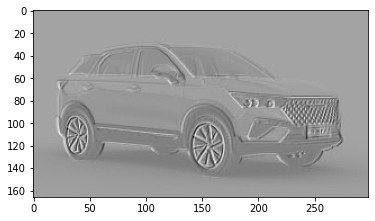

In [51]:
result = simple_conv(imgFilter=random_f, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [53]:
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img,cmap="gray")
    return img
  from google.colab.patches import cv2_imshow
  cv2_imshow(img)
  return img

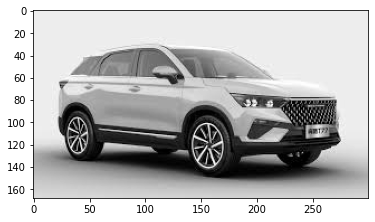

In [54]:
#greyscale image
car = read_img(img_path)

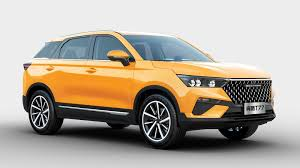

In [55]:
#color image
color_car = read_img(img_path, grayscale=False)

In [56]:
# (1,r,c,1)
row,col = car.shape
car = car.reshape(1,row,col,1) # grayscale
# color_car = color_car.reshape(1,row,col,3) # colored
car.shape

(1, 168, 300, 1)

In [57]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [58]:
out = conv_model.predict(car)

1/1 [==============================] - 0s 290ms/step


In [59]:
out.shape

(1, 166, 298, 1)

In [60]:
row, col = out.shape[1:-1]

In [61]:
reshape_out = out.reshape(row, col)

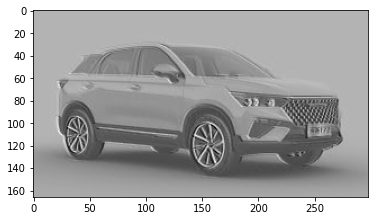

In [62]:
plt.imshow(reshape_out, cmap="gray")

In [63]:
# (1,r,c,1)
row,col,depth = color_car.shape
# car = car.reshape(1,row,col,1) # grayscale
color_car = color_car.reshape(1,row,col,depth) # colored
color_car.shape

(1, 168, 300, 3)

In [64]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=color_car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [65]:
out = conv_model.predict(color_car)

1/1 [==============================] - 0s 47ms/step


In [66]:
out.shape

(1, 166, 298, 1)

In [67]:
row, col = out.shape[1:-1]
reshape_out = out.reshape(row, col)

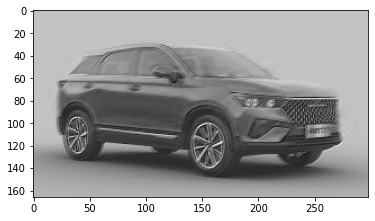

In [68]:
plt.imshow(reshape_out, cmap="gray")

In [69]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters, 
                                      kernel_size=filter_size, 
                                      strides=(1,1),
                                      input_shape=input_shape, 
                                      padding=padding)]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row, col, depth = out.shape[1:]
    reshape_out = out.reshape(row, col, depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e

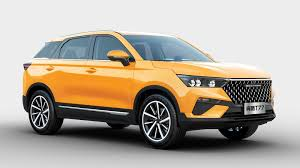

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 46ms/step
(1, 166, 298, 1)


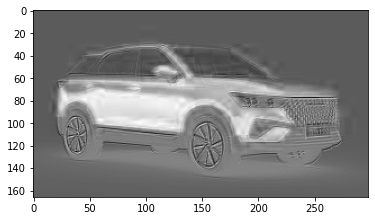

In [70]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)

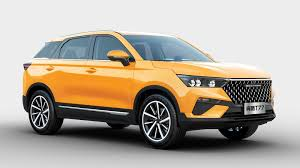

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 74ms/step
(1, 166, 298, 10)


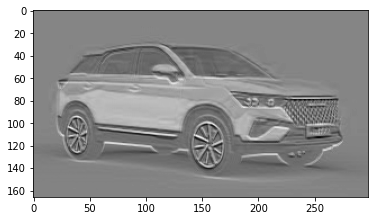

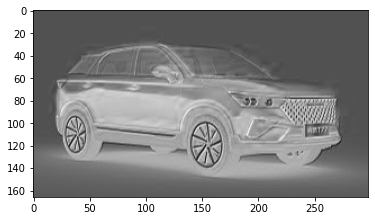

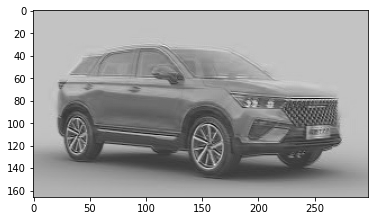

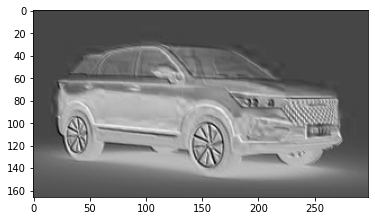

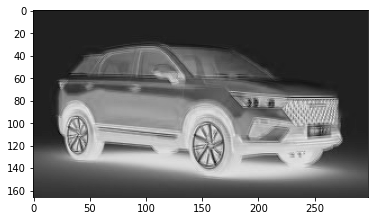

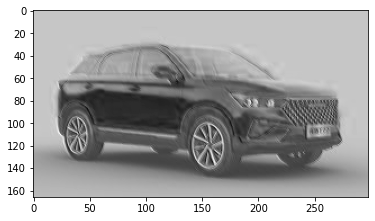

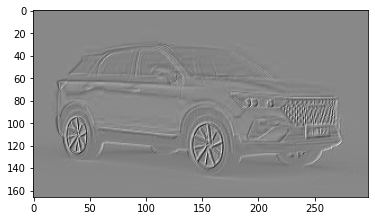

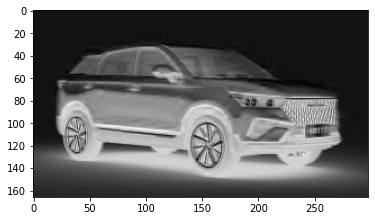

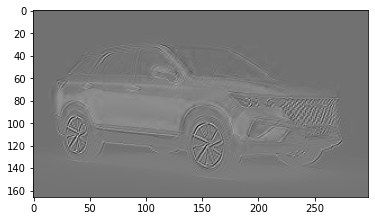

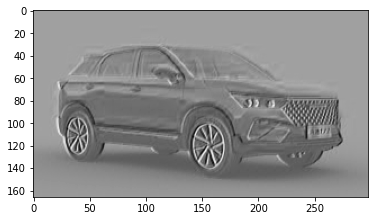

In [71]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=10, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)

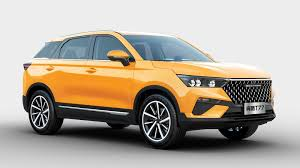

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 168, 300, 10)      280       
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 62ms/step
(1, 168, 300, 10)


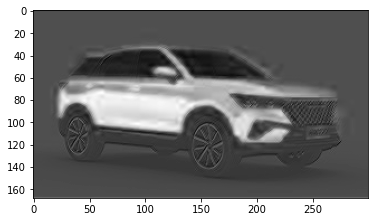

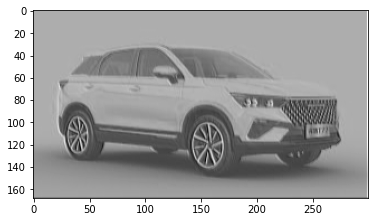

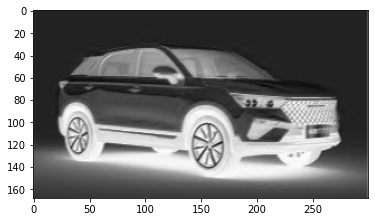

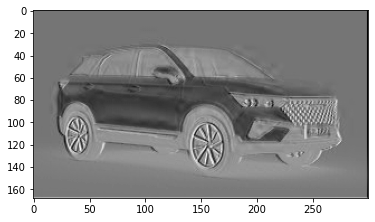

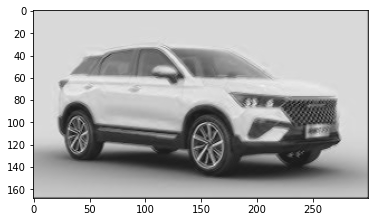

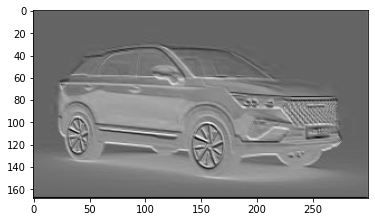

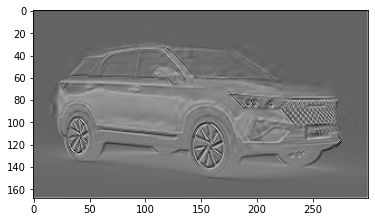

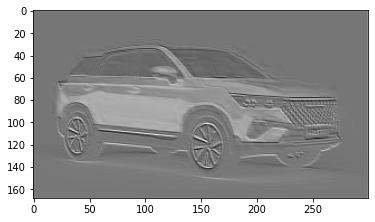

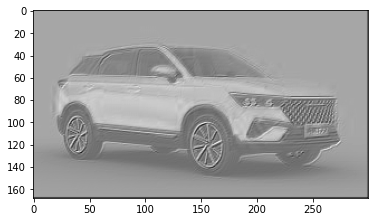

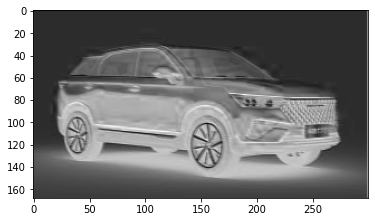

In [72]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=10, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:], padding="same")
apply_conv_model_and_visualize(input_img, model)

In [73]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
  result = pooling_layer(reshaped_img)
  return result

(168, 300)
(1, 84, 150, 1)


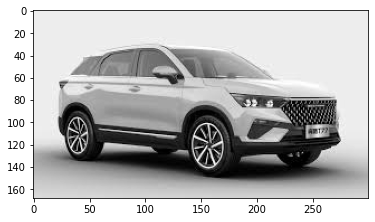

In [74]:
img = read_img(img_path)
print(img.shape)
result = max_pooling(img)
print(result.shape)

In [75]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape = tf.reshape(result, (row, col))
  plt.imshow(reshape, cmap="gray")

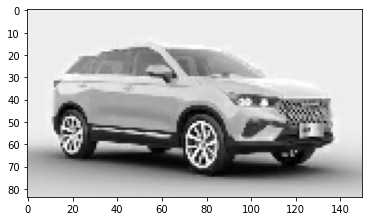

In [76]:
plot_pooling(result)

In [77]:
_, row, col, _ = result.shape
reshape = tf.reshape(result, (row, col))

In [78]:
result = max_pooling(reshape.numpy())
print(result.shape)

(1, 42, 75, 1)


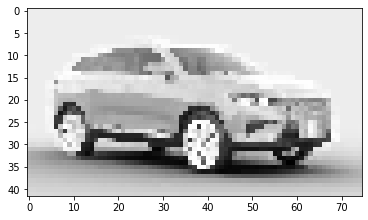

In [79]:
plot_pooling(result)

# GlobalAvgPool2D

In [80]:
def global_avg_pooling(img, grayscale):

  reshaped_img = reshaping_in(img, grayscale)
  pooling_layer = tf.keras.layers
  
  result = pooling_layer(reshaped_img)
  return result

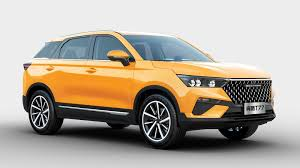

(168, 300, 3)


TypeError: ignored

In [81]:
img = read_img(img_path, grayscale=False)
print(img.shape)
result = global_avg_pooling(img, grayscale=False)
print(result.shape)
print(result)

In [82]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape = tf.reshape(result, (row, col))
  plt.imshow(reshape, cmap="gray")

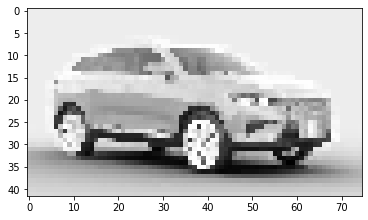

In [83]:
plot_pooling(result)

In [84]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=color_car.shape[1:],
                                    activation="relu" ),
              tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
              tf.keras.layers.GlobalAveragePooling2D(),
              tf.keras.layers.Dense(10,activation="relu"),
              tf.keras.layers.Dense(2,activation="softmax")]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 83, 149, 1)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1)                0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 70
Trainable params: 70
Non-trainable pa

In [85]:
model.save("model.h5")

In [86]:
a = np.zeros((2, 3, 4))

In [87]:
a

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])